# Using Tranformers Embeddings for Classification

# Imports

In [17]:
import os
from pathlib import Path
import re
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


In [18]:
directory = Path(os.path.abspath('')).parents[0]
sample_data_dir = os.path.join(directory,"data/rvl_cdip_1000_samples")
temp_data_dir = os.path.join(directory,"data/temp")
processed_data_dir = os.path.join(directory,"data/processed")
output_folder_dir = os.path.join(directory,"data/temp")



datasets_data_dir = os.path.join(directory,"data/datasets")

df = pd.read_csv(datasets_data_dir+'/train_dataset_transformers.csv')



In [19]:
df.head()

,image,image_class,sentences_count,characters_count,count_words,duplicates_count,chars_excl_spaces_count,whole_numbers_count,alpha_numeric_count,punctuations_count,...,embed_feature_375,embed_feature_376,embed_feature_377,embed_feature_378,embed_feature_379,embed_feature_380,embed_feature_381,embed_feature_382,embed_feature_383,embed_feature_384
0,image_0794.png,0,12,2256,346,37,1937,42,1852,84,...,0.000662,-0.003625,-0.009486,0.000792,-0.006163,0.000395,-0.006680,0.003040,-0.016223,0.000102
1,image_0757.png,0,3,1593,218,35,1394,18,1350,44,...,-0.000353,-0.002826,-0.007968,-0.000859,-0.005365,0.000788,-0.004773,0.001273,-0.015015,-0.000380
2,image_0395.png,0,3,862,142,22,754,14,703,51,...,0.002076,-0.001355,-0.007374,0.001285,-0.005671,-0.001008,-0.005850,0.000896,-0.012871,0.001004
3,image_0427.png,0,9,1524,264,29,1289,11,1240,49,...,0.001234,-0.001933,-0.009194,0.003223,-0.006184,-0.000011,-0.008010,0.001840,-0.013203,0.000929
4,image_0552.png,0,2,1889,311,21,1611,11,1562,49,...,0.003268,-0.004070,-0.011892,0.002765,-0.008220,0.000921,-0.009694,0.005725,-0.013242,-0.000496


# Selecting Data Fields

In [20]:

df_train = df[df.columns.difference(['image','image_cass'])]
df_train.head()


,alpha_numeric_count,characters_count,chars_excl_spaces_count,count_words,duplicates_count,embed_feature_1,embed_feature_10,embed_feature_100,embed_feature_101,embed_feature_102,...,embed_feature_99,image_class,noun_phase_count,punctuations_count,sentences_count,sentiment_polarity_score,sentiment_subjectivity_score,spelling_quality_score,stop_words_count,whole_numbers_count
0,1852,2256,1937,346,37,-0.012580,0.000820,0.886983,0.002601,0.001130,...,-0.003374,0,159,84,12,0.130000,0.445741,0.700906,78,42
1,1350,1593,1394,218,35,-0.010365,0.000689,0.885159,0.000469,0.001159,...,-0.003502,0,122,44,3,0.103788,0.290404,0.807882,31,18
2,703,862,754,142,22,-0.010054,0.000636,0.886832,-0.001700,0.001762,...,-0.002335,0,46,51,3,0.291667,0.345833,0.758929,33,14
3,1240,1524,1289,264,29,-0.010783,-0.000436,0.886115,0.000414,0.000665,...,-0.004602,0,94,49,9,-0.289048,0.647619,0.824490,99,11
4,1562,1889,1611,311,21,-0.016791,-0.000970,0.889780,0.000701,0.003498,...,-0.005791,0,159,49,2,0.289881,0.372173,0.589286,67,11


In [21]:
df_label = df['image_class']
df_label

0      0
1      0
2      0
3      0
4      0
      ..
995    9
996    9
997    9
998    9
999    9
Name: image_class, Length: 1000, dtype: int64

# Train - Test  Split

In [22]:
from sklearn.model_selection import train_test_split

train_df, test_df,y_train,y_test  = train_test_split(df_train,df_label, test_size=0.25)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)
print('y_train shape: ',y_train.shape)
print('y_test shape: ',y_test.shape)

train shape:  (750, 398)
test shape:  (250, 398)
y_train shape:  (750,)
y_test shape:  (250,)


# Model Selection

In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import set_option
# from pandas.tools.plotting import scatter_matrix

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [24]:
#evaluation - baselines
num_folds = 10
seed = 13
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('ABC', AdaBoostClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('XGB', XGBClassifier()))


results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, train_df.to_numpy(),y_train.to_numpy(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s %f %f " % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR 0.348000 0.062097 
LDA 0.456000 0.055873 
KNN 0.246667 0.036393 
ABC 0.450667 0.116512 
RFC 0.618667 0.064000 
ETC 0.642667 0.041226 
XGB 0.994667 0.006532 


# Model Traning

In [25]:
model = XGBClassifier()
model.fit(train_df.to_numpy(), y_train.to_numpy(), 
          eval_set=[(train_df.to_numpy(), y_train.to_numpy()), (test_df.to_numpy(), y_test.to_numpy())], 
          early_stopping_rounds=10)

[0]	validation_0-mlogloss:1.13237	validation_1-mlogloss:1.26870
[1]	validation_0-mlogloss:0.78604	validation_1-mlogloss:0.93612
[2]	validation_0-mlogloss:0.56816	validation_1-mlogloss:0.71201
[3]	validation_0-mlogloss:0.41798	validation_1-mlogloss:0.55552
[4]	validation_0-mlogloss:0.31141	validation_1-mlogloss:0.44361
[5]	validation_0-mlogloss:0.23323	validation_1-mlogloss:0.35298
[6]	validation_0-mlogloss:0.17547	validation_1-mlogloss:0.27904
[7]	validation_0-mlogloss:0.13326	validation_1-mlogloss:0.22067
[8]	validation_0-mlogloss:0.10230	validation_1-mlogloss:0.17610
[9]	validation_0-mlogloss:0.07911	validation_1-mlogloss:0.14132
[10]	validation_0-mlogloss:0.06200	validation_1-mlogloss:0.11396
[11]	validation_0-mlogloss:0.04954	validation_1-mlogloss:0.09324
[12]	validation_0-mlogloss:0.04011	validation_1-mlogloss:0.07691
[13]	validation_0-mlogloss:0.03322	validation_1-mlogloss:0.06438
[14]	validation_0-mlogloss:0.02809	validation_1-mlogloss:0.05458
[15]	validation_0-mlogloss:0.02395	

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [26]:
y_pred = model.predict(train_df.to_numpy())

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score ,f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def eval_metrics(actual, pred):

    r2 = r2_score(actual, pred)
    f1 = f1_score(actual, pred,average='micro')
    accuracy = accuracy_score(actual, pred)
    precision = precision_score(actual, pred, average='micro')
    recall = recall_score(actual, pred,average='micro')
    
    print('R2 Score:', r2)
    print('F1 Score:', f1)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    

In [28]:
eval_metrics(y_train,y_pred)

R2 Score: 1.0
F1 Score: 1.0
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [29]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred = model.predict(test_df.to_numpy())
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

plt.show()

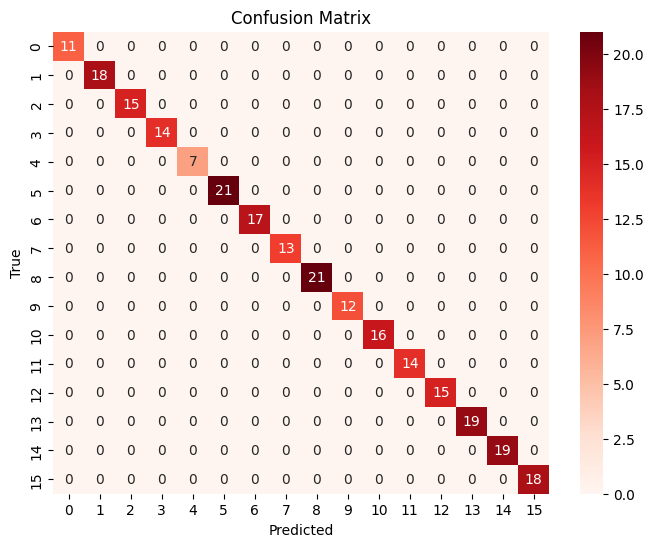

In [30]:
import seaborn as sns
title='Confusion Matrix'
y_pred = model.predict(test_df.to_numpy())
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
    
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d',cmap='Reds')
plt.title(title)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Feature Importance

In [31]:
imp_score = {}
feature_list = list(df_train.columns)
for idx,score in enumerate(model.feature_importances_):
    imp_score[feature_list[idx]]=score
    
feats_importance = pd.DataFrame(imp_score.items(),columns = ['feature_name','score'])
feats_importance.sort_values(by='score',ascending=False)

,feature_name,score
333,embed_feature_49,0.143105
3,count_words,0.107286
0,alpha_numeric_count,0.084196
313,embed_feature_377,0.061157
125,embed_feature_207,0.060617
...,...,...
205,embed_feature_28,0.000000
206,embed_feature_280,0.000000
208,embed_feature_282,0.000000
210,embed_feature_284,0.000000


In [32]:
feats_importance[feats_importance['score']==0]

,feature_name,score
1,characters_count,0.0
4,duplicates_count,0.0
5,embed_feature_1,0.0
7,embed_feature_100,0.0
8,embed_feature_101,0.0
...,...,...
390,noun_phase_count,0.0
391,punctuations_count,0.0
392,sentences_count,0.0
394,sentiment_subjectivity_score,0.0
